# Lab 2.4

Goals:
* Use arrays to compute approximations of integrals.
* Use graphs and formulas to bound the error of these approximations.
* Understand how the actual error is related to the error bound, and how the shape of the function affects that relationship.
* Use flow-control and the rectangle method to visualize integral approximations.

### Instructions
* With your group, work through each of the questions below.  Most questions include some discussion and some bullet-pointed instructions.  Make sure you carry out the bullet-pointed instructions, because that it what is graded.  
* You are expected to collaborate with your group.  You should arrive at the answers to these questions together.  However, your submitted answers should be expressed in your own words.
* If you need to pause, you can save and come back to your work later.  
* When you are done, select "download .ipynb" from the file menu.  Save the ipynb to your computer, then upload it to the Lab assignment in gradescope.


We will begin by importing the libraries we use for graphing.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

Define five algebraic functions by running this cell.  Each person in your group should pick a different one of these functions.  For the rest of the lab, $f(x)$ refers to the function you picked.

In [ ]:
def f1(x):
  return x**3 - 6*x**2 + 14*x - 6
  # actual integral: 108.75

def f2(x):
  return -x**3 + 6*x**2 - 4*x + 20
  # actual integral: 136.25

def f3(x):
  return -2*x**3 + 24*x**2 - 80*x + 100
  # actual integral: 172.5

def f4(x):
  return x**4 - 16*x**3 + 96*x**2 - 264*x +300
  # actual integral: 135

def f5(x):
  return -x**3 + 12*x**2 - 57*x + 130
  # actual integral: 188.75

We'll be computing left-hand approximations of $\int_1^6 f(x)~dx$ (where $f$ is your function).

### Q1

* Copy your left-hand approximation code from Exercise 2 of the pre-lab.  
* Modify it to use your function, instead of `f()` (or you can redefine `f()` to be your function),
* Run your code to produce the $L_{10}$ approximation of the integral of your function from 1 to 6.


In [ ]:
n=10
deltax=(6-1)/n
x=np.arange(1,6,0.5)
left=f1(x)*deltax
np.sum(left)

90.9375

### Q2


* Define a function `df(x)` which returns the derivative $f'(x)$ at `x`.
* Graph $f(x)$ and $f'(x)$.

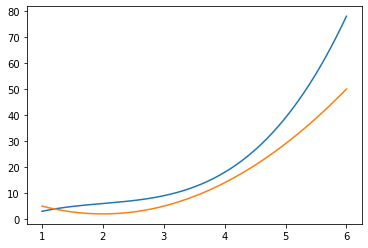

In [ ]:
def df(x):
  return 3*x**2 - 12*x + 14
x=np.arange(1,6,0.001)
ax=plt.axes()
ax.plot(x,f1(x)) #blue
ax.plot(x,df(x)) #orange
plt.show()

### Q3

* Look at your graph in Q2.  What bound $S$ can you put on $|f'(x)|$ over the interval $[1,6]$.
* Use $S$ to compute the theoretical error bound of the $L_{10}$ approximation. Look up the formula if you need it.  Since it's good practice, input the arithmetic for this formula into a code cell and compute it there.

In [ ]:
#I will set S = 6 as the bound
n=10
EL=(df(6)*((6-1)**2))/(2*n)
print(EL)

62.5


### Q4

How does the error bound relate to the actual error?  
* Compute $L_{100}$ and $L_{1000}$ approximations of $\int_1^6 f(x)~dx$.  You can reuse your work from Q1.
* The actual value of $\int_1^6 f(x)~dx$ is in a comment in the code cell that defined the five functions.  Compute the actual error of your $L_{10}$, $L_{100}$ and $L_{1000}$ approximations.
* Compute the theoretical error bound of each approximation.
* What percentage of the theoretical error bound is each actual error?
* How does the number of rectangles appear to affect the percentages you computed?  Compare your data to your group-mates and make a general observation, containing specific references to their data.


In [ ]:
# L10
# 1.
n=10
deltax=(6-1)/n
x=np.arange(1,6,0.5)
left=f1(x)*deltax
print(np.sum(left)) # L10 approximation
# 2.
print(108.75-np.sum(left)) # actual error of L10 approximation
# 3.
n=10
EL=(df(6)*((6-1)**2))/(2*n)
print(EL) # theoretical error of L10 approximation
# 4.
print(((108.75-np.sum(left))/((df(6)*((6-1)**2))/(2*n)))*100) # percentage of L10 theoretical error

90.9375
17.8125
62.5
28.499999999999996


In [ ]:
# L100
# 1.
n1=100
deltax=(6-1)/n1
x=np.arange(1,6,deltax)
left1=f1(x)*deltax
print(np.sum(left1)) #L100 approximation
# 2.
print(108.75-np.sum(left1)) # actual error of L100 approximation
# 3.
n1=100
EL1=(df(6)*((6-1)**2))/(2*n1)
print(EL1) # theoretical error of L100 approximation
# 4.
print(((108.75-np.sum(left1))/((df(6)*((6-1)**2))/(2*n1)))*100) # percentage of L100 theoretical error

106.88437500000025
1.8656249999997527
6.25
29.849999999996047


In [ ]:
# L1000
# 1.
n2=1000
deltax=(6-1)/n2
x=np.arange(1,6,deltax)
left2=f1(x)*deltax
print(np.sum(left2)) #L1000 approximation
# 2.
print(108.75-np.sum(left2)) # actual error of L1000 approximation
# 3.
n2=1000
EL2=(df(6)*((6-1)**2))/(2*n2)
print(EL2) # theoretical error of L1000 approximation
# 4.
print(((108.75-np.sum(left2))/((df(6)*((6-1)**2))/(2*n2)))*100) # percentage of L1000 theoretical error

108.56259374999402
0.18740625000597788
0.625
29.985000000956465


5.

As the number of rectangles increased, the percentages increased. For example, for my function, f1(x), the percentages increase from "28.49", "29.85", to "29.99". For my partner's function, f2(x), the percentages increase from "53.125", "61.56", to "62.41".

However, for my another partner's function, f5(x), the percentages decrease from "45.14", "44.51", to "44.45".

### Q5

Some functions have an actual error $E_L$ that is a relatively large percentage of the theoretical bound.  Others have $E_L$ that is much smaller than the theoretical bound.  This is our main question:  

> What properties of a function make the actual error $E_L$ a larger or smaller percentage of the theoretical error bound?

* In a text cell, compare your percentages to that of your groupmates, specifically referencing their data.  
* Come up with a conjecture about what properties of your graphs cause the actual error to be a larger or smaller percentage of the theoretical error bound.  
* For full credit, give a plausible mathematical reason why your conjecture might be true.






1.

My function, f1(x), makes the actual error the smallest percentage of the theoretical error bound out of the 3 functions my group chose, since the percentages are the smallest: "28.49", "29.85", to "29.99".

My partner's function, f2(x), makes the actual error the largest percentage of the theoretical error bound, since the percentages are the largest: "53.125", "61.56", to "62.41".

The percentages of my other partner's function, f5(x), are between the percentages of f1(x) and f2(x), since the percentages are "45.14", "44.51", to "44.45".

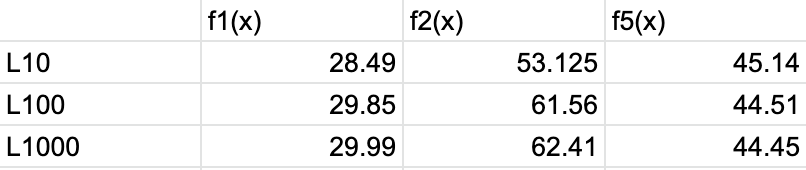

2.

I think a graph that looks like a straight line (wiht nonzero slope) causes the actual error to be a larger percentage of the theoretical error bound.

3.

To test this out, I first  calculated the percentages of f3(x) and f4(x). And the order of percentages from smallest to largest are: f4(x) < f3(x) < f1(x) < f5(x) < f2(x).

Then, I graphed each function to understand what they look like.

On [1, 6], the slope f2(x) is the smallest, which mean it resembles a striaght line more. Thus, it makes senses that f2(x) causes the actual error to be a larger percentage of the theoretical error bond.

In [ ]:
# f3(x)
# 1.
n=10
deltax=(6-1)/n
x=np.arange(1,6,0.5)
left=f3(x)*deltax
print(np.sum(left)) # L10 approximation
# 2.
print(172.5-np.sum(left)) # actual error of L10 approximation
# 3.
n=10
def df(x):
  return -6*x**2 + 48*x - 80
EL=(df(4)*((6-1)**2))/(2*n)
print(EL) # theoretical error of L10 approximation
# 4.
print(((172.5-np.sum(left))/((df(4)*((6-1)**2))/(2*n)))*100) # percentage of L10 theoretical error
print("")

# L100
# 1.
n1=100
deltax=(6-1)/n1
x=np.arange(1,6,deltax)
left1=f3(x)*deltax
print(np.sum(left1)) #L100 approximation
# 2.
print(172.5-np.sum(left1)) # actual error of L100 approximation
# 3.
n1=100
EL1=(df(4)*((6-1)**2))/(2*n1)
print(EL1) # theoretical error of L100 approximation
# 4.
print(((172.5-np.sum(left1))/((df(4)*((6-1)**2))/(2*n1)))*100) # percentage of L100 theoretical error
print("")

# L1000
# 1.
n2=1000
deltax=(6-1)/n2
x=np.arange(1,6,deltax)
left2=f3(x)*deltax
print(np.sum(left2)) #L1000 approximation
# 2.
print(172.5-np.sum(left2)) # actual error of L1000 approximation
# 3.
n2=1000
EL2=(df(4)*((6-1)**2))/(2*n2)
print(EL2) # theoretical error of L1000 approximation
# 4.
print(((172.5-np.sum(left2))/((df(4)*((6-1)**2))/(2*n2)))*100) # percentage of L1000 theoretical error

170.625
1.875
20.0
9.375

172.25625000000008
0.24374999999992042
2.0
12.187499999996021

172.4750624999981
0.024937500001897206
0.2
12.468750000948603



In [ ]:
# f4(x)
# 1.
n=10
deltax=(6-1)/n
x=np.arange(1,6,0.5)
left=f4(x)*deltax
print(np.sum(left)) # L10 approximation
# 2.
print(135-np.sum(left)) # actual error of L10 approximation
# 3.
n=10
def df(x):
  return 4*x**3 - 48*x**3 + 192*x - 264
EL=(df(6)*((6-1)**2))/(2*n)
print(EL) # theoretical error of L10 approximation
# 4.
print(((135-np.sum(left))/((df(6)*((6-1)**2))/(2*n)))*100) # percentage of L10 theoretical error
print("")

# L100
# 1.
n1=100
deltax=(6-1)/n1
x=np.arange(1,6,deltax)
left1=f4(x)*deltax
print(np.sum(left1)) #L100 approximation
# 2.
print(135-np.sum(left1)) # actual error of L100 approximation
# 3.
n1=100
EL1=(df(6)*((6-1)**2))/(2*n1)
print(EL1) # theoretical error of L100 approximation
# 4.
print(((135-np.sum(left1))/((df(6)*((6-1)**2))/(2*n1)))*100) # percentage of L100 theoretical error
print("")

# L1000
# 1.
n2=1000
deltax=(6-1)/n2
x=np.arange(1,6,deltax)
left2=f4(x)*deltax
print(np.sum(left2)) #L1000 approximation
# 2.
print(135-np.sum(left2)) # actual error of L1000 approximation
# 3.
n2=1000
EL2=(df(6)*((6-1)**2))/(2*n2)
print(EL2) # theoretical error of L1000 approximation
# 4.
print(((135-np.sum(left2))/((df(6)*((6-1)**2))/(2*n2)))*100) # percentage of L1000 theoretical error

164.15625
-29.15625
-10770.0
0.27071727019498604

137.65416562499996
-2.654165624999962
-1077.0
0.24644063370473185

135.2627916665641
-0.26279166656411235
-107.7
0.24400340442350266


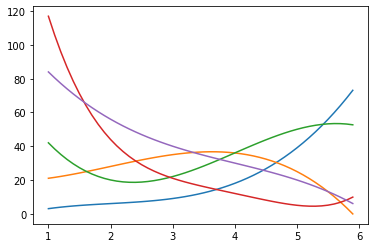

In [ ]:
x=np.arange(1,6,0.1)
plt.plot(x,f1(x)) # blue
plt.plot(x,f2(x)) # orange
plt.plot(x,f3(x)) # green
plt.plot(x,f4(x)) # red
plt.plot(x,f5(x)) # purple
plt.show()

This is a better graph:
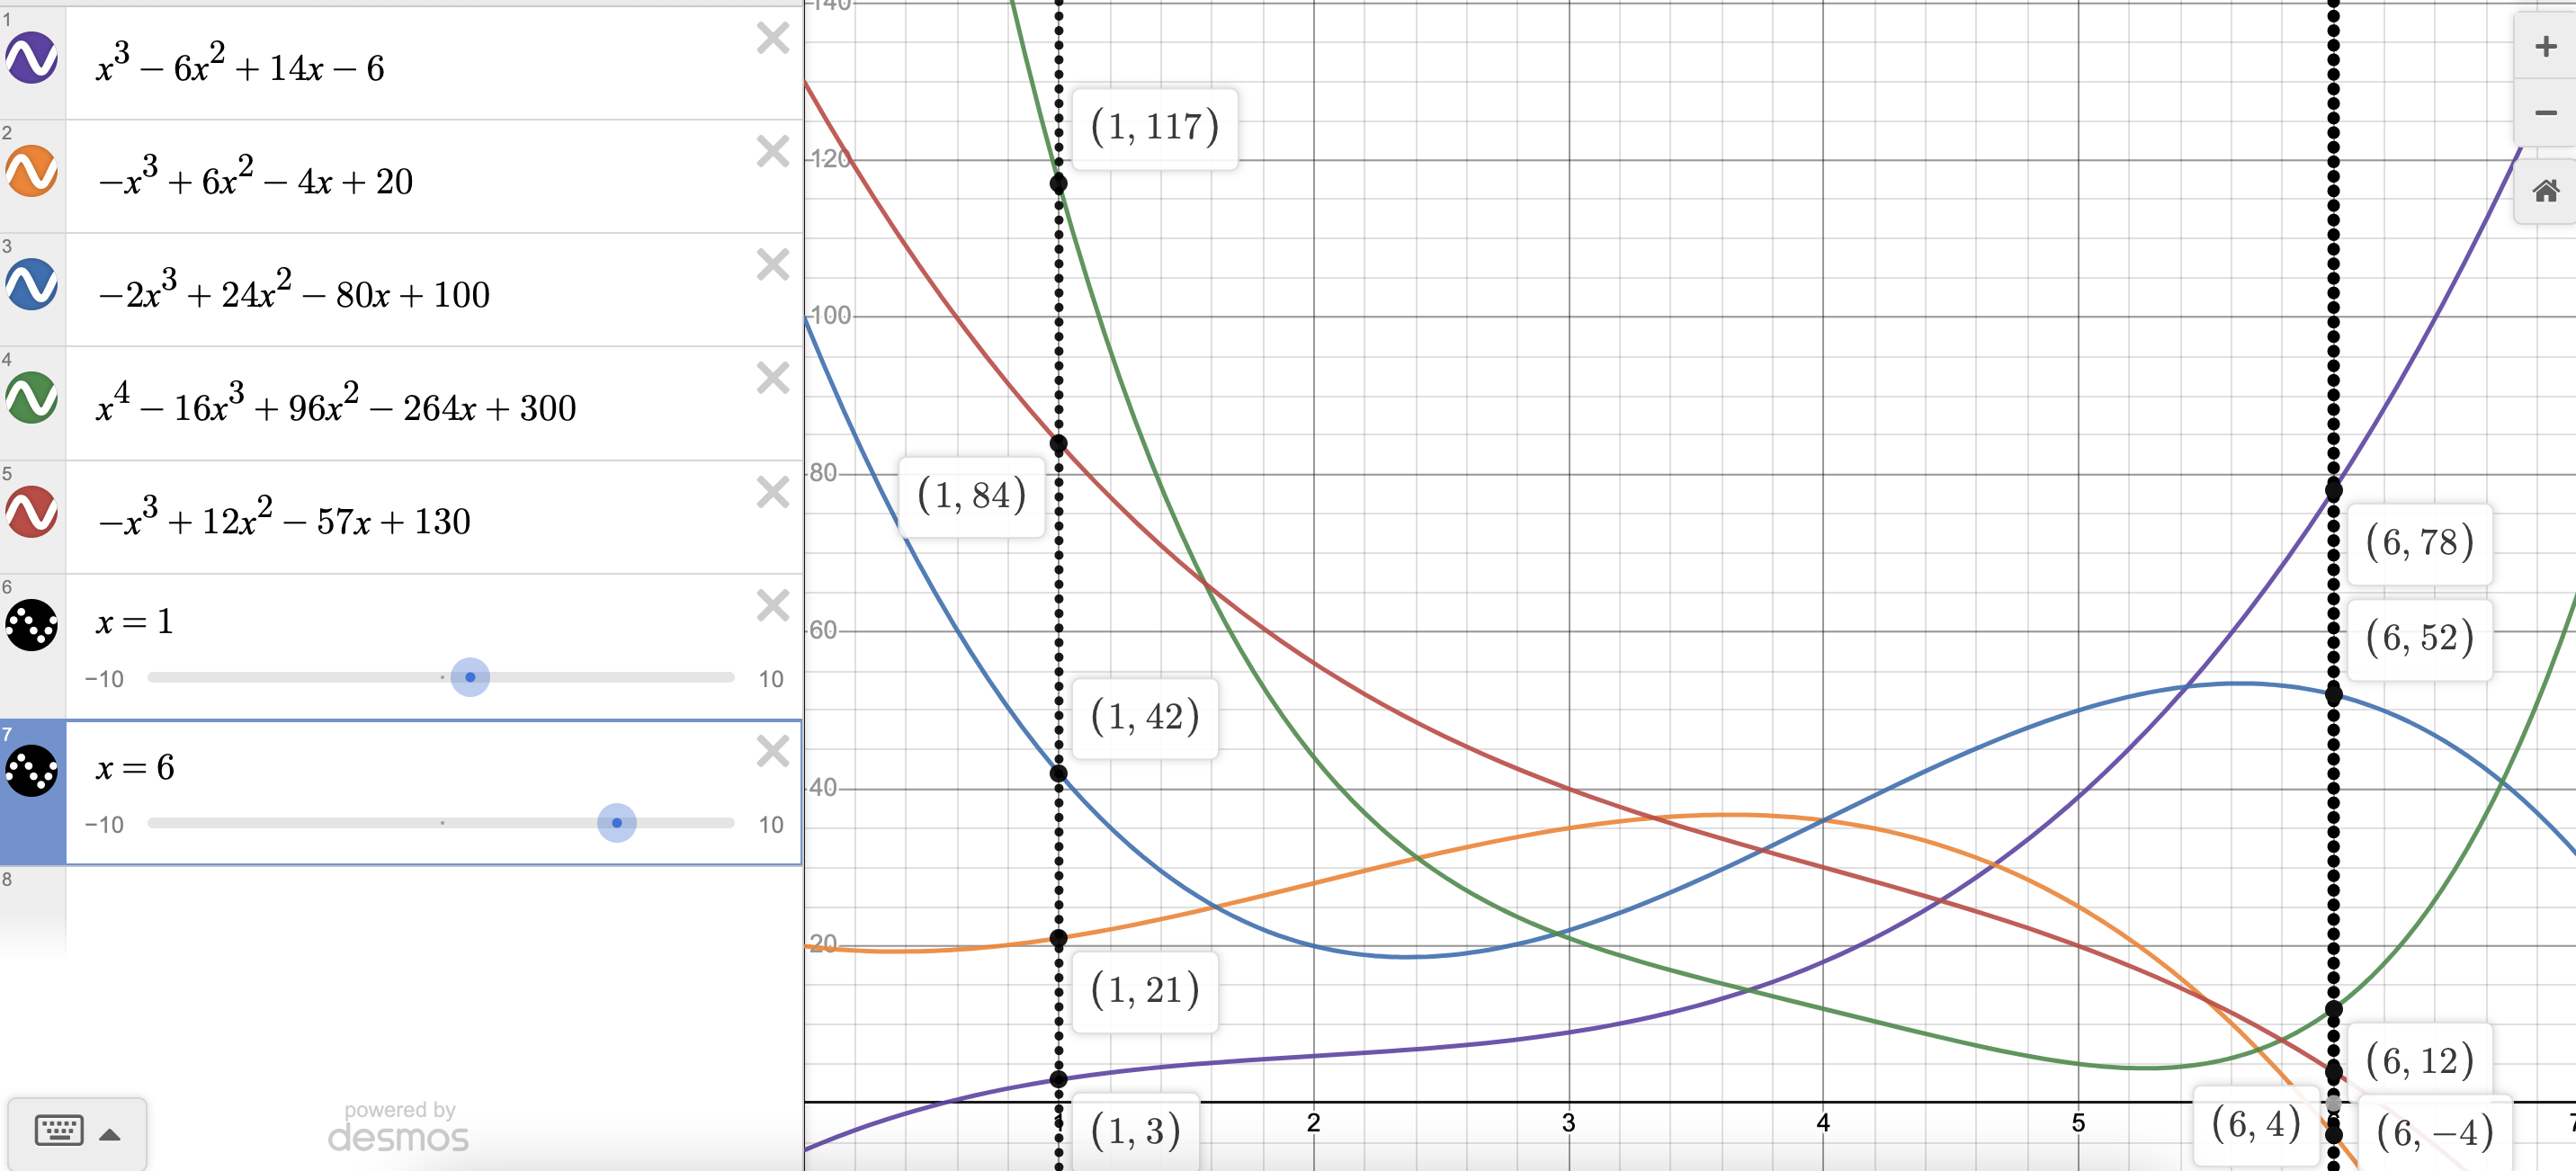

### Q6

* Copy your code to display the rectangles of the $L_{10}$ approximation of $$\int_1^6 x^2~dx$$ from Exercise 7 of the pre-lab into a code cell below.
* Modify as necessary to use your function instead.
* Run the code to show a plot of your function and the 10 rectangles of the approximation.

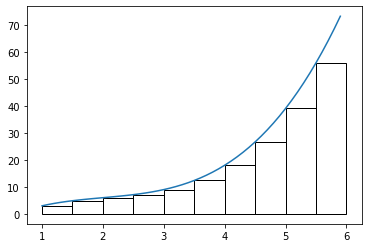

In [ ]:
n=10
deltax=(6-1)/n
xvalues=np.arange(1,6,0.5)
ax=plt.axes()
x=np.arange(1,6,0.1)
ax.plot(x,f1(x))
for i in xvalues:
  rect=patches.Rectangle((i,0), deltax, f1(i), fill=False)
  ax.add_patch(rect)
plt.show()